<a href="https://colab.research.google.com/github/CormacKrum/Deep-Learning/blob/master/CNN_Cats_Dogs_Humans_Horses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0

--2020-06-19 18:24:16--  https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca [following]
--2020-06-19 18:24:16--  https://www.dropbox.com/sh/raw/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce54b76798468cbb6b5335d9d9a.dl.dropboxusercontent.com/zip_download_get/AdXSHj_oQnHnHTQWmlkUKJ16XxLszgziYnDoB6r-YLs4hF6rZc-wAdVn9Yta8WWFB_ibAx_RwGSJtvsd3Rur2d5Qq5txjsO5lb7iU8jEiypH3Q [following]
--2020-06-19 18:24:18--  https://uce54b76798468cbb6b5335d9d9a.dl.dropboxusercontent.com/zip_download_get/AdXSHj_oQnHnHTQWmlkUKJ16XxLszgziYnDoB6r-YLs4hF6rZc-wAdVn9Yta8WWFB_ibAx_RwGSJtvsd3

In [2]:
! unzip AABXTlPlU-1f4L_VdS4wY06ca?dl=0

Archive:  AABXTlPlU-1f4L_VdS4wY06ca?dl=0
mapname:  conversion of  failed
   creating: Images/
   creating: Images/cats/
   creating: Images/dogs/
   creating: Images/horses/
   creating: Images/humans/
 extracting: Images/cats/cat.3.jpg   
 extracting: Images/dogs/dog.3.jpg   
 extracting: Images/cats/cat.8.jpg   
 extracting: Images/dogs/dog.8.jpg   
 extracting: Images/cats/cat.5.jpg   
 extracting: Images/dogs/dog.5.jpg   
 extracting: Images/cats/cat.6.jpg   
 extracting: Images/dogs/dog.2.jpg   
 extracting: Images/dogs/dog.9.jpg   
 extracting: Images/dogs/dog.4.jpg   
 extracting: Images/cats/cat.1.jpg   
 extracting: Images/cats/cat.9.jpg   
 extracting: Images/dogs/dog.7.jpg   
 extracting: Images/cats/cat.4.jpg   
 extracting: Images/dogs/dog.6.jpg   
 extracting: Images/cats/cat.7.jpg   
 extracting: Images/dogs/dog.1.jpg   
 extracting: Images/cats/cat.2.jpg   
 extracting: Images/dogs/dog.82.jpg  
 extracting: Images/cats/cat.75.jpg  
 extracting: Images/cats/cat.45.jpg  


In [3]:
!ls

'AABXTlPlU-1f4L_VdS4wY06ca?dl=0'   Images   sample_data


In [4]:
import os
folders = os.listdir("Images")

In [5]:
for f in folders:
  path = "Images/"+f
  print(f+" "+str(len(os.listdir(path))))

dogs 202
cats 202
humans 202
horses 202


In [6]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [7]:
sample_path = "Images/cats/cat.1.jpg"
img = image.load_img(sample_path)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


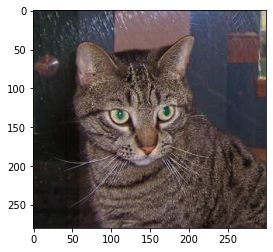

In [8]:
x= image.img_to_array(img)/255.0
plt.imshow(x)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [14]:
from keras import optimizers
adam = optimizers.adam(lr=1e-4)
model.compile(optimizer =adam ,metrics=["accuracy"],loss='categorical_crossentropy')

In [17]:
from keras.preprocessing.image import ImageDataGenerator
training_gen = ImageDataGenerator(rescale = 1.0/255)
train_generator = training_gen.flow_from_directory("Images/",target_size=(150,150),batch_size=32,class_mode="categorical")

Found 808 images belonging to 4 classes.


In [18]:
X,y = train_generator.next()

In [21]:
history = model.fit_generator(train_generator,epochs=40,steps_per_epoch=7)

Epoch 1/40
7/7 [==============================] - 1s 100ms/step - loss: 0.9508 - accuracy: 0.5800
Epoch 2/40
7/7 [==============================] - 1s 113ms/step - loss: 0.8846 - accuracy: 0.6384
Epoch 3/40
7/7 [==============================] - 1s 98ms/step - loss: 0.9670 - accuracy: 0.5759
Epoch 4/40
7/7 [==============================] - 1s 107ms/step - loss: 0.9348 - accuracy: 0.6071
Epoch 5/40
7/7 [==============================] - 1s 107ms/step - loss: 0.8784 - accuracy: 0.6562
Epoch 6/40
7/7 [==============================] - 1s 99ms/step - loss: 0.9737 - accuracy: 0.6200
Epoch 7/40
7/7 [==============================] - 1s 108ms/step - loss: 0.8717 - accuracy: 0.6339
Epoch 8/40
7/7 [==============================] - 1s 103ms/step - loss: 0.9060 - accuracy: 0.6205
Epoch 9/40
7/7 [==============================] - 1s 104ms/step - loss: 0.8108 - accuracy: 0.6696
Epoch 10/40
7/7 [==============================] - 1s 94ms/step - loss: 0.7519 - accuracy: 0.6950
Epoch 11/40
7/7 [=====